# Assignment 2: Loading Graphs in Networkx

## 0. Import Packages

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## 1. Read the csv file into a data frame

In [2]:
def csv_to_dataframe(path: str) -> pd.DataFrame:
    """ Accepts a path to a CSV file and returns the data as a Pandas DataFrame object.
    
    Parameters
    ----------
        path: String object specifying path to CSV data file.
    
    Returns
    -------
        dataframe: Pandas Dataframe object corresponding to input path.
    """
    
    data = pd.read_csv(path)
    return data

## 2. Create a graph from the data frame

In [3]:
def dataframe_to_digraph(dataframe: pd.DataFrame) -> nx.DiGraph:
    """ Create and return a directed graph generated from input dataframe.
    
    Parameters
    ----------
        dataframe: Pandas Dataframe object.
    
    Returns
    -------
        digraph: Networkx Directed Graph generated from input dataframe.
    """
    
    graph = nx.from_pandas_edgelist(dataframe,'From', 'To', edge_attr='Rate', create_using=nx.DiGraph())
    return graph

## 3. Visualize the graph using a shell layout

In [4]:
def graph_shell(digraph: nx.DiGraph) -> None:
    """ Generate visualization of directed graph.
    
    Parameters
    ----------
        digraph: Networkx DiGraph object containing graph to visualize.
    """
    
    %matplotlib notebook
    pos = nx.shell_layout(digraph)
    nx.draw_networkx(digraph, pos, with_labels=True)

## 4. Start analyzing the graph

### 4.1 Who was the employee `that was rated` the most?

In [5]:
def most_rated(digraph: nx.DiGraph) -> str:
    """ Retrieve the name of the employee who recieved the most ratings.
    
    Parameters
    ----------
        digraph: Networkx DiGraph object containing employee rating network.
    
    Returns
    -------
        most_rated: String object containing name of the most rated employee.
    """
    
    indegree_list = digraph.in_degree()
    sorted_indegrees = sorted(indegree_list, key=lambda node: node[1], reverse=True)  # Sort nodes by indegree value.
    # The first cell in the list contains the most rated employee. First value in the tuple contains the name of employee.
    return sorted_indegrees[0][0]

### 4.2 Who was the employee `that rated` the most?

In [7]:
def rated_most(digraph: nx.DiGraph) -> str:
    """ Retrieve the name of the employee who supplied the most ratings.
    
    Parameters
    ----------
        digraph: Networkx DiGraph object containing employee rating network.
    
    Returns
    -------
        rated_most: String object containing name of the employee who supplied
            the most ratings.
    """

    outdegree_list = digraph.out_degree()
    sorted_outdegrees = sorted(outdegree_list, key=lambda node: node[1], reverse=True)  # Sort nodes by outdegree value.
    # The first cell in the list contains employee who rated most. First value in the tuple contains the name of employee.
    return sorted_outdegrees[0][0]

### 4.3 Who was the employee with the highest average rate?

In [8]:
def _comp_average(dataframe: pd.DataFrame) -> dict:
    """ Helper function for computing average score given a Pandas DataFrame."""
    
    dict_of_averages = dict()
    name_set = set(dataframe["To"])  # Set contains no copies.
    
    for name in name_set:  # Loop over names to initialize average dictionary.
        dict_of_averages[name] = 0  # Initialize rating to 0.
        loop_counter = 0
    
        for (to_name, rating) in zip(dataframe["To"], dataframe["Rate"]):
            if to_name == name:
                dict_of_averages[name] += rating  # Accumulate sum of ratings in dictionary.
                loop_counter += 1
        
        dict_of_averages[name] /= loop_counter  # Compute average.
        loop_counter = 0
    
    return dict_of_averages

In [9]:
def highest_rated(dataframe: pd.DataFrame) -> str:
    """ Retrieve the name of the employee with the highest average rating.
    
    Parameters
    ----------
        dataframe: Pandas Dataframe object containing score data.
    
    Returns
    -------
        highest_rated: Name of the employee with the highest average rating.
    """
    
    dict_of_averages = _comp_average(dataframe)
    return max(dict_of_averages, key=lambda name: dict_of_averages[name])
    

### 4.4 Who was the employee with the lowest average rate?

In [10]:
def lowest_rated(dataframe: pd.DataFrame) -> str:
    """ Retrieve the name of the employee with the lowest average rating.
    
    Parameters
    ----------
        dataframe: Pandas Dataframe object with score data.
    
    Returns
    -------
        lowest_rated: Name of the employee with the lowest average rating.
    """
    
    dict_of_averages = _comp_average(dataframe)
    return min(dict_of_averages, key=lambda name: dict_of_averages[name])

## Final: Analyze data with generated functions.

<IPython.core.display.Javascript object>


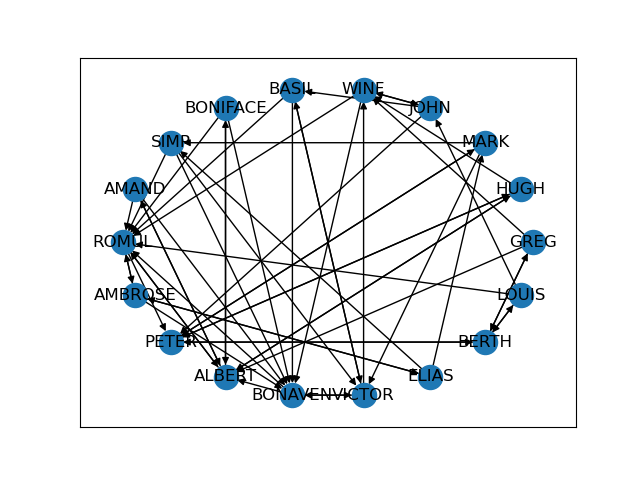

Most Rated: ROMUL
Rated Most: ALBERT
Highest Rated: BERTH
Lowest Rated: LOUIS


In [11]:
path_to_data = "rate.csv"
dataframe = csv_to_dataframe(path_to_data)
digraph = dataframe_to_digraph(dataframe)
graph_shell(digraph)

most_rated_emp = most_rated(digraph)
emp_rated_most = rated_most(digraph)
high_rated = highest_rated(dataframe)
low_rated = lowest_rated(dataframe)

print(F"Most Rated: {most_rated_emp}")
print(F"Rated Most: {emp_rated_most}")
print(F"Highest Rated: {high_rated}")
print(F"Lowest Rated: {low_rated}")

## Extra Observations

In [12]:
def employees_who_rated_each_other(dataframe: pd.DataFrame) -> list:
    """ Retrieve the employees who rated each other
    
    Parameters
    ----------
        dataframe: Pandas Dataframe object with score data.
    
    Returns
    -------
        empsWhoRatedEachOther: List of all the employees who rated each other
    """
        
    listOfPairs = []
    employeesList1 = dataframe["From"].values # creates a list of all the values under the 'From' column
    employeesList2 = dataframe["To"].values # creates a list of all the values under the 'To' column
    
    for i in range(len(employeesList1)):
        listOfPairs.append((employeesList1[i], employeesList2[i])) # populates listOfPairs with tuples
    
    listOfReversedPairs = [(y, x) for x, y in listOfPairs]  # Reverses each tuple in listOfPairs
    
    empsWhoRatedEachOther = []
    for pair1 in listOfPairs:
        for pair2 in listOfReversedPairs:
            if pair1 == pair2:
                empsWhoRatedEachOther.append(pair1) # if a pair in listOfPairs matches a pair in listOfReversedPairs
                # then those two employees rated each other

    return empsWhoRatedEachOther
    
    

In [13]:
# path_to_data = "rate.csv"
# dataframe = csv_to_dataframe(path_to_data)  # Do not need to restructure dataframe. Previously generated df will do. 
emps_who_rated_each_other = employees_who_rated_each_other(dataframe)
print(F"Employees who rated each other:\n {emps_who_rated_each_other}\n")
print(F"For comparison here is the dataframe:\n{dataframe}")

Employees who rated each other:
 [('ROMUL', 'AMBROSE'), ('ROMUL', 'ALBERT'), ('BONAVEN', 'VICTOR'), ('AMBROSE', 'ROMUL'), ('AMBROSE', 'ELIAS'), ('BERTH', 'PETER'), ('BERTH', 'LOUIS'), ('BERTH', 'GREG'), ('PETER', 'BERTH'), ('PETER', 'HUGH'), ('PETER', 'MARK'), ('LOUIS', 'BERTH'), ('VICTOR', 'BONAVEN'), ('VICTOR', 'BASIL'), ('WINF', 'JOHN'), ('JOHN', 'WINF'), ('GREG', 'BERTH'), ('HUGH', 'PETER'), ('HUGH', 'ALBERT'), ('BONIFACE', 'ALBERT'), ('MARK', 'PETER'), ('ALBERT', 'ROMUL'), ('ALBERT', 'HUGH'), ('ALBERT', 'BONIFACE'), ('ALBERT', 'AMAND'), ('AMAND', 'ALBERT'), ('BASIL', 'VICTOR'), ('ELIAS', 'AMBROSE')]

For comparison here is the dataframe:
        From        To  Rate
0      ROMUL   AMBROSE     2
1      ROMUL     PETER     3
2      ROMUL    ALBERT     1
3    BONAVEN     ROMUL     3
4    BONAVEN    VICTOR     2
5    BONAVEN    ALBERT     1
6    AMBROSE     ROMUL     2
7    AMBROSE   BONAVEN     3
8    AMBROSE     ELIAS     1
9      BERTH     PETER     3
10     BERTH     LOUIS     1
1